In [1]:
%pylab inline
import Tools.ext as Te
import Tools.display as Td
import Tools.functions as Tf
from scipy.stats import ranksums

Populating the interactive namespace from numpy and matplotlib


In [2]:
dir_512 = '../../../TimeCourses/Jonathan/512/'
Reg = 'grey_matter_sansSB_sansLCR/'
cen512 = Te.data2array('../../../Connectomes/Jonathan/512/centres/p06.npy')[:,1:]
KS = sorted([k.rstrip('.txt') for k in Te.os.listdir(dir_512 + Reg)])
LBL512 = Te.data2array('../../../Connectomes/Jonathan/LBL512_REMAKE_hemihemi.npy')

# All Nodes TC Dynamic

In [6]:
TCDs = []
for k in KS:
    tc = Te.data2array('../../../TimeCourses/Jonathan/512/grey_matter_sansSB_sansLCR/%s.txt'%k) # (TIME x SPACE)
    TCD = Tf.fPearsonCorrelation(tc.T)
    TCDs.append(TCD)

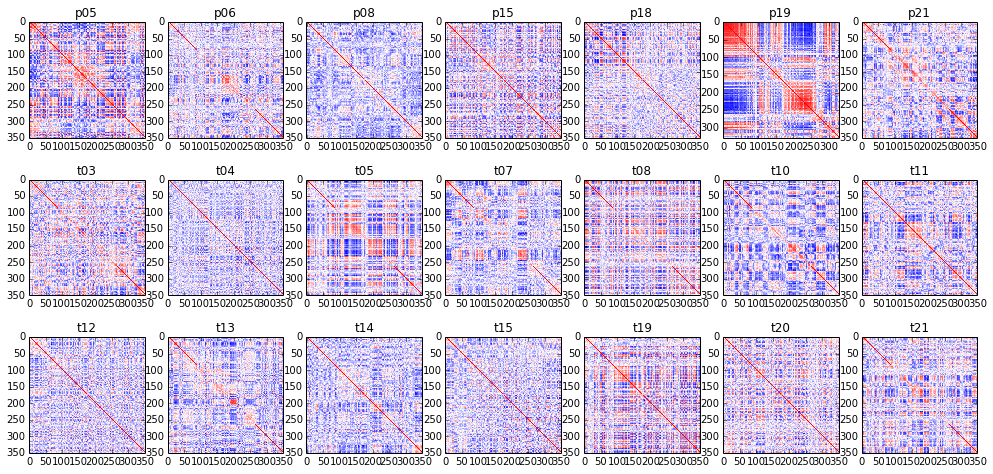

In [16]:
Td.mapMatrices(array(TCDs), lTitl=KS, fs=(17,8), ncl=(3,7), cmap='bwr', interpolation='nearest')

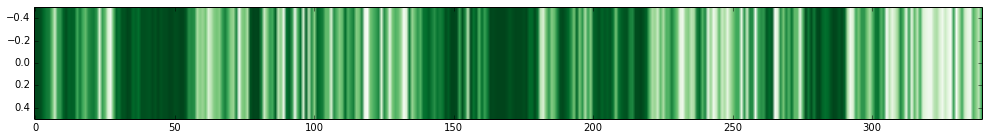

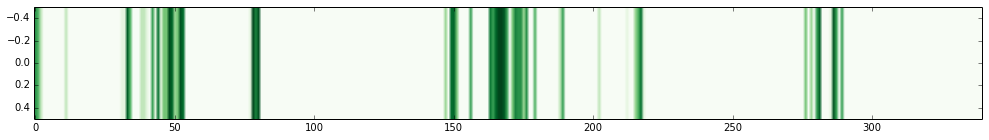

In [28]:
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[ik], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1]
    
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);

### Permutation : in general few or less than normal order

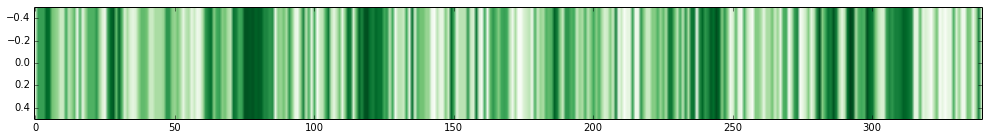

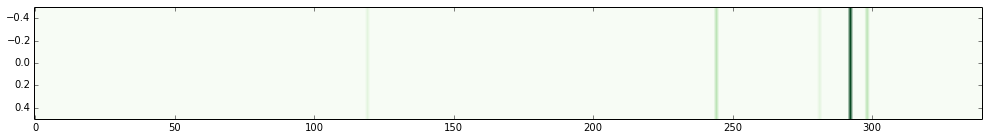

In [40]:
perm = permutation(len(KS))
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[perm[ik]], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1]
    
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);

# Sub Nodes TC Dynamic ($\forall$ Temp Reg)

In [48]:
Ns = arange(512)
n, N = len(Ns), 512
iA = arange( n*N ).reshape((n, N))
iD = iA[xrange(n), Ns]
iNs = setdiff1d(iA, iD)

In [50]:
t = 0
temp_ind = []
for i in range(512):
    if "Temporal" in LBL512[i]:
        temp_ind.append(i)
        t = 1
    elif LBL512[i] == "" and t:
        temp_ind.append(i)
    else:
        t = 0        

In [51]:
TCDs = []
for k in KS:
    tc = Te.data2array('../../../TimeCourses/Jonathan/512/grey_matter_sansSB_sansLCR/%s.txt'%k)[:, temp_ind]
    TCD = Tf.fPearsonCorrelation(tc.T)
    TCDs.append(TCD)

In [52]:
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[ik], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1] / (len(temp_ind) / 512.)

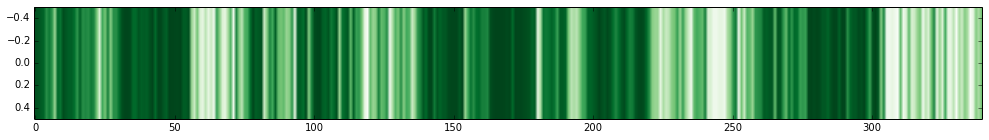

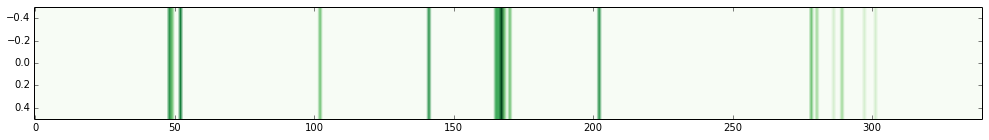

In [53]:
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);

### Permutation : in general few or less than normal order

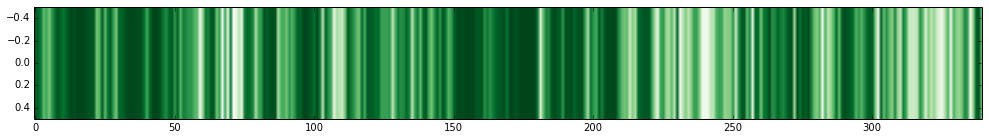

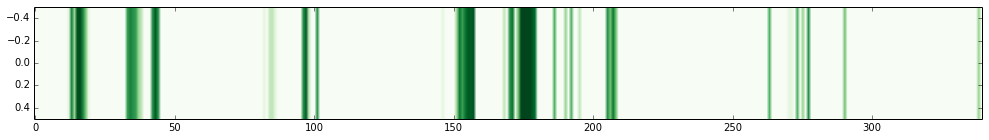

In [77]:
perm = permutation(len(KS))
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[perm[ik]], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1]
    
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);

# Sub Nodes TC Dynamic (Right Temp Reg)

In [93]:
Ns = arange(512)
n, N = len(Ns), 512
iA = arange( n*N ).reshape((n, N))
iD = iA[xrange(n), Ns]
iNs = setdiff1d(iA, iD)

In [94]:
t = 0
temp_ind = []
for i in range(512):
    if "Temporal" in LBL512[i] and "_R" in LBL512[i]:
        temp_ind.append(i)
        t = 1
    elif LBL512[i] == "" and t:
        temp_ind.append(i)
    else:
        t = 0        

In [95]:
TCDs = []
for k in KS:
    tc = Te.data2array('../../../TimeCourses/Jonathan/512/grey_matter_sansSB_sansLCR/%s.txt'%k)[:, temp_ind]
    TCD = Tf.fPearsonCorrelation(tc.T)
    TCDs.append(TCD)

In [102]:
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[ik], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1] / (len(temp_ind) / 512.)

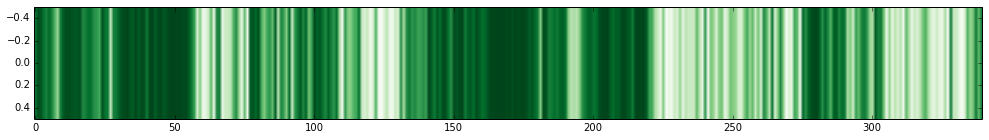

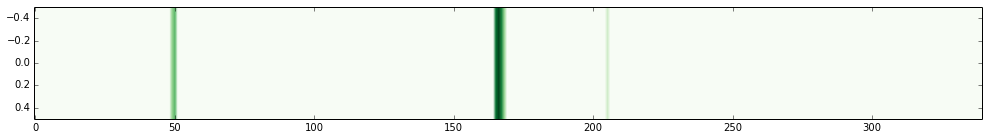

In [103]:
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);

### Permutation : in general few or less than normal order

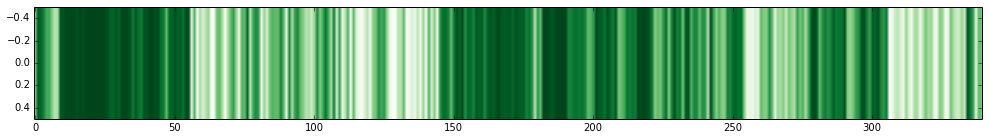

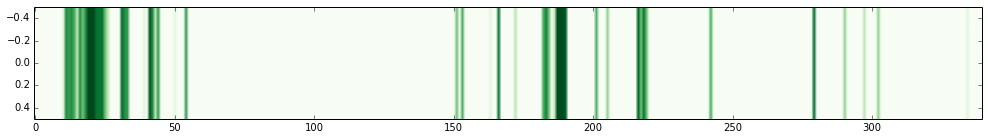

In [136]:
perm = permutation(len(KS))
S = zeros(340)
for itau, tau in zip(range(340), range(1,341)):
    tmp = zeros(len(KS))
    
    for ik, k in zip(range(len(KS)), KS):
        dists = 1.- diag(TCDs[perm[ik]], k=tau)
        tmp[ik] = median(dists)

    S[itau] = ranksums(tmp[0:7], tmp[7:21])[1]
    
ek=0.05
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r');
figure(figsize=(17,2)); imshow(S[newaxis], aspect='auto', cmap='Greens_r', vmax=ek);